,Number of People,Denman,Hornby,CV,BC,Canada
0,1 person,240,285,9370,600705,4396015
1,2 persons,315,260,13380,719865,5124800
2,3 persons,70,55,4210,296200,2194825
3,4 persons,40,45,3315,256700,2002455
4,5 or more persons,25,15,1660,168355,1260850


0         240
1         315
2          70
3          40
4          25
5         285
6         260
7          55
8          45
9          15
10       9370
11      13380
12       4210
13       3315
14       1660
15     600705
16     719865
17     296200
18     256700
19     168355
20    4396015
21    5124800
22    2194825
23    2002455
24    1260850
Name: Counts, dtype: int64

KeyError: 'Requested level (Number of People) does not match index name (Location)'

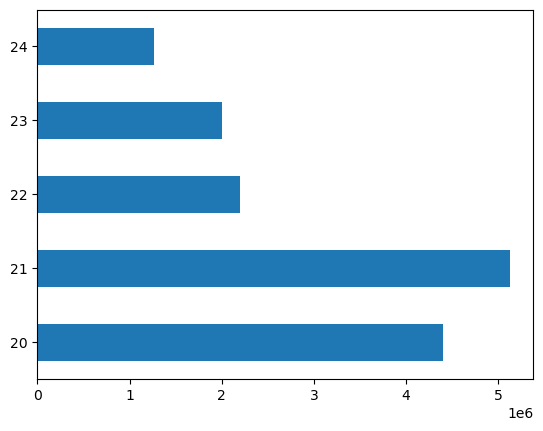

In [121]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd

csv = pd.read_csv("householdsize.csv", dtype={"Number of People": "category"})
display(csv)
csv_long = csv.melt("Number of People",
                    var_name="Location", value_name="Counts")

locations = csv_long.Location
type(locations)
display(csv_long.groupby("Location")["Counts"].head())

long_group = csv_long.groupby(
    locations, sort=False)["Counts"]
# display(csv_long)
long_group.plot.barh(stacked=True).unstack("Number of People")
plt.legend(bbox_to_anchor=(0.5, 1.02), loc="lower center",
           borderaxespad=0, frameon=False, ncol=5)

for idx, row in long_group.reset_index(drop=True).iterrows():
    print(idx, row)
    cumulative = 0
    for el in row:
        plt.text(cumulative + el/2, idx,
                 f"{int(el*100)}%", va="center", ha="center")
        cumulative += el
plt.tight_layout()